In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
df = pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [42]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)
yes_no_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE']
for column in yes_no_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 2 else 0)
df['GENDER'] = df['GENDER'].apply(lambda x: 1 if x == 'M' else 0)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,1,2,1,2,2,2,2,2,2,1
1,1,74,1,0,0,0,2,2,2,1,1,1,2,2,2,1
2,0,59,0,0,0,1,1,2,1,2,1,2,2,1,2,0
3,1,63,1,1,1,0,1,1,1,1,2,1,1,2,2,0
4,0,63,0,1,0,0,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,2,2,1,1,2,2,2,2,1,1
305,1,70,1,0,0,0,1,2,2,2,2,2,2,1,2,1
306,1,58,1,0,0,0,1,1,2,2,2,2,1,1,2,1
307,1,67,1,0,1,0,1,2,2,1,2,2,2,1,2,1


# From Scratch

In [43]:
train_data = df.loc[:247,:]
X_train = train_data.drop(["LUNG_CANCER"], axis=1).values
y_train = train_data["LUNG_CANCER"].values

test_data = df.loc[247:,:]
X_test = test_data.drop(["LUNG_CANCER"], axis=1).values
y_test = test_data["LUNG_CANCER"].values

In [51]:
train_data = df.loc[:247, :]
X_train = train_data.drop(["LUNG_CANCER"], axis=1).values
y_train = train_data["LUNG_CANCER"].values

test_data = df.loc[247:, :]
X_test = test_data.drop(["LUNG_CANCER"], axis=1).values
y_test = test_data["LUNG_CANCER"].values

import numpy as np

class LogisticRegressions:
    def __init__(self, alpha=0.001, num_iter=1500):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None

    def hypothesis(self, X):
        m = X.shape[0]
        n = X.shape[1]
        h0_x = np.zeros(m)
        
        for i in range(m):
            h0_x[i] = 0
            for j in range(n):
                h0_x[i] += X[i, j] * self.theta[j]
        
        return h0_x

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        h0_x = self.hypothesis(X)
        g_x = self.sigmoid(h0_x)
        epsilon = 1e-15
        g_x = np.clip(g_x, epsilon, 1 - epsilon)
        
        m = X.shape[0]
        cost = 0
        
        for i in range(m):
            cost += (y[i] * np.log(g_x[i]) + (1 - y[i]) * np.log(1 - g_x[i]))
        
        L0 = -cost / m
        return L0
    
    def gradient(self, X, y):
        m = len(y)
        h0_x = self.hypothesis(X)
        g_x = self.sigmoid(h0_x)
        
        dL0_d0j = np.zeros(X.shape[1])
        
        for i in range(m):
            for j in range(X.shape[1]):
                dL0_d0j[j] += (g_x[i] - y[i]) * X[i, j]
        
        return dL0_d0j / m

    def gradient_descent(self, X, y, alpha=0.001, num_iter=1500):
        if self.theta is None:
            self.theta = np.zeros(X.shape[1])
        
        cost_history = []
        
        for i in range(self.num_iter):
            dL0_d0j = self.gradient(X, y)
            self.theta -= alpha * dL0_d0j
            cost = self.cost(X, y)
            cost_history.append(cost)
        
        return self.theta, cost_history

    def predict(self, X):
        h0_x = self.hypothesis(X)
        g_x = self.sigmoid(h0_x)
        return np.where(g_x >= 0.5, 1, 0)
    
    # Calculating MAE, MSE, and R² Score from scratch
    def mean_absolute_error(self, y_true, y_pred):
        return sum(abs(y_pred[i] - y_true[i]) for i in range(len(y_true))) / len(y_true)
    
    def mean_squared_error(self, y_true, y_pred):
        return sum((y_pred[i] - y_true[i]) ** 2 for i in range(len(y_true))) / len(y_true)

    def r2_score(self, y_true, y_pred):
        mean_y = sum(y_true) / len(y_true)
        ss_tot = sum((y - mean_y) ** 2 for y in y_true)
        ss_res = sum((y_pred[i] - y_true[i]) ** 2 for i in range(len(y_true)))
        return 1 - (ss_res / ss_tot)

model = LogisticRegressions(alpha=0.001, num_iter=1500)
theta, cost_history = model.gradient_descent(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating accuracy, MAE, MSE, and R² score
accuracy = np.mean(y_pred == y_test)
mae = model.mean_absolute_error(y_test, y_pred)
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r2_score(y_test, y_pred)

print("Model accuracy:", accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Model accuracy: 0.8387096774193549
Mean Absolute Error: 0.16129032258064516
Mean Squared Error: 0.16129032258064516
R2 Score: -0.19230769230769051


# Using SKlearn

In [52]:
X_sklearn = df.drop(["LUNG_CANCER"], axis=1).values
y_sklearn = df["LUNG_CANCER"].values

X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)

scaler_sklearn = StandardScaler()
X_train_scaled_sklearn = scaler_sklearn.fit_transform(X_train_sklearn)
X_test_scaled_sklearn = scaler_sklearn.transform(X_test_sklearn)

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train_scaled_sklearn, y_train_sklearn)
y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled_sklearn)

r2 = r2_score(y_test_sklearn, y_pred_sklearn)
mae = mean_absolute_error(y_test_sklearn, y_pred_sklearn)
mse = mean_squared_error(y_test_sklearn, y_pred_sklearn)

print("Sklearn Model - R2 Score:", r2)
print("Sklearn Model - MAE:", mae)
print("Sklearn Model - MSE:", mse)

scores_sklearn = cross_val_score(log_reg_sklearn, X_train_scaled_sklearn, y_train_sklearn, cv=5, scoring="r2")
print("Cross-Validation R2 Scores:", scores_sklearn)
print("Average R2 Score:", scores_sklearn.mean())

Sklearn Model - R2 Score: -0.03333333333333344
Sklearn Model - MAE: 0.03225806451612903
Sklearn Model - MSE: 0.03225806451612903
Cross-Validation R2 Scores: [0.10714286 0.10714286 0.66666667 0.16666667 0.5       ]
Average R2 Score: 0.3095238095238095


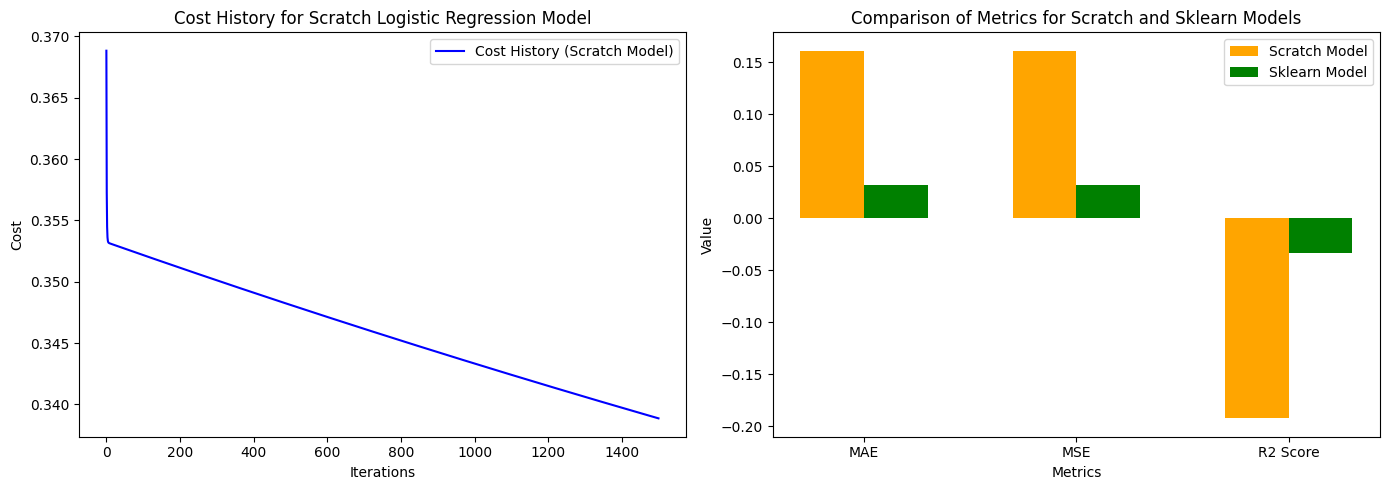

In [55]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history, label='Cost History (Scratch Model)', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Scratch Logistic Regression Model')
plt.legend()

metrics = ['MAE', 'MSE', 'R2 Score']
scratch_metrics = [0.16129032258064516, 0.16129032258064516, -0.19230769230769051]
sklearn_metrics = [0.03225806451612903, 0.03225806451612903, -0.03333333333333344]

x = range(len(metrics))

plt.subplot(1, 2, 2)
plt.bar(x, scratch_metrics, width=0.3, label='Scratch Model', color='orange')
plt.bar([p + 0.3 for p in x], sklearn_metrics, width=0.3, label='Sklearn Model', color='green')
plt.xticks([p + 0.15 for p in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Scratch and Sklearn Models')
plt.legend()

plt.tight_layout()
plt.show()
